In [2]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

$\Large\text{Data load}$

In [3]:
path_folder = 'TOP4040/'

In [4]:
folder = Path(path_folder)

In [5]:
data = np.load(path_folder + '2.npz')['arr_0']

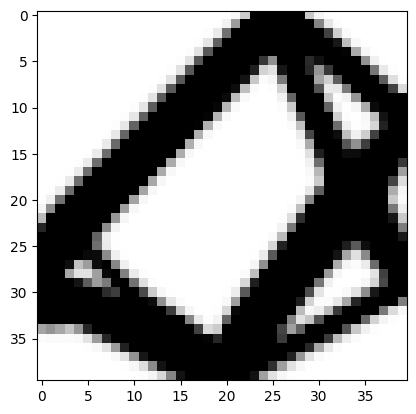

In [6]:
plt.imshow(data[-1], cmap='Greys')

$\Large\text{Examples of tensor usage}$

In [7]:
x = torch.rand(6,6)
x

tensor([[0.1361, 0.8152, 0.9643, 0.5684, 0.3691, 0.1918],
        [0.8246, 0.0525, 0.3091, 0.9786, 0.6088, 0.0507],
        [0.0307, 0.9375, 0.1591, 0.8031, 0.1363, 0.4498],
        [0.9796, 0.1499, 0.5227, 0.9865, 0.9434, 0.9351],
        [0.8365, 0.0042, 0.5259, 0.5746, 0.5655, 0.1489],
        [0.6398, 0.6891, 0.4378, 0.5375, 0.8022, 0.9342]])

In [8]:
x.view(36)

tensor([0.1361, 0.8152, 0.9643, 0.5684, 0.3691, 0.1918, 0.8246, 0.0525, 0.3091,
        0.9786, 0.6088, 0.0507, 0.0307, 0.9375, 0.1591, 0.8031, 0.1363, 0.4498,
        0.9796, 0.1499, 0.5227, 0.9865, 0.9434, 0.9351, 0.8365, 0.0042, 0.5259,
        0.5746, 0.5655, 0.1489, 0.6398, 0.6891, 0.4378, 0.5375, 0.8022, 0.9342])

In [9]:
x.view(3,12)

tensor([[0.1361, 0.8152, 0.9643, 0.5684, 0.3691, 0.1918, 0.8246, 0.0525, 0.3091,
         0.9786, 0.6088, 0.0507],
        [0.0307, 0.9375, 0.1591, 0.8031, 0.1363, 0.4498, 0.9796, 0.1499, 0.5227,
         0.9865, 0.9434, 0.9351],
        [0.8365, 0.0042, 0.5259, 0.5746, 0.5655, 0.1489, 0.6398, 0.6891, 0.4378,
         0.5375, 0.8022, 0.9342]])

In [10]:
x.view(-1, 12) # -1 , python automatically calculate the size

tensor([[0.1361, 0.8152, 0.9643, 0.5684, 0.3691, 0.1918, 0.8246, 0.0525, 0.3091,
         0.9786, 0.6088, 0.0507],
        [0.0307, 0.9375, 0.1591, 0.8031, 0.1363, 0.4498, 0.9796, 0.1499, 0.5227,
         0.9865, 0.9434, 0.9351],
        [0.8365, 0.0042, 0.5259, 0.5746, 0.5655, 0.1489, 0.6398, 0.6891, 0.4378,
         0.5375, 0.8022, 0.9342]])

In [29]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [30]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [31]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [32]:
a.add_(5)
a

tensor([6., 6., 6., 6., 6.])

In [33]:
b

array([6., 6., 6., 6., 6.], dtype=float32)

In [34]:
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [36]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

tensor([1., 1., 1., 1., 1.], requires_grad=True)

$\Large\text{Gradient calculation with autograd}$

In [39]:
x = torch.rand(3)
x

tensor([0.9773, 0.5993, 0.3714])